# Data Link
https://drive.google.com/open?id=1JjrPp4OLNrSvds7Qfm7RGL7107-cf20S

In [173]:
import numpy as np
import pandas as pd
import os
import requests
import pprint
import matplotlib.pyplot as plt
import requests
import operator
from datetime import datetime
from dateutil import tz
import operator
from collections import OrderedDict
from math import isnan
import re
from IPython.display import Image

In [73]:
def clean_tweet(tweet):
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [74]:
def wordcloud_plot(text, colour):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = colour,
        stopwords = STOPWORDS).generate(str(text))

    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    return plt.show()

In [98]:
if __name__ == "__main__":
    FILENAME_DATASET = 'bjp_twitter.csv'
    df = pd.read_csv(FILENAME_DATASET)
    df = df[~df.tweet_text.str.contains("RT")]

# Data Formate

In [99]:
df.head()

,Unnamed: 0,tweet_id,tweet_text,content-type,url,hashtags,likes,retweet_count,user_mentions
0,0,1117368225036029952,"मोदी का मिशन है आतंकवाद को हटाना, भ्रष्टाचार क...",photo,https://t.co/drjxlouGui,HarVoteModiKo,65,24,"[{'screen_name': 'narendramodi', 'name': 'Chow..."
1,1,1117367619399475200,आतंकवाद हटना चाहिए या नहीं?\n\nपाकिस्तानी आतंक...,photo,https://t.co/nI5JC4ikOG,HarVoteModiKo,137,55,[]
2,2,1117366290501365760,"उत्तर प्रदेश ने राजनीति का वो दौर भी देखा है, ...",No,No,HarVoteModiKo,216,72,"[{'screen_name': 'narendramodi', 'name': 'Chow..."
3,3,1117366072712187910,"अपने स्वार्थ की पूर्ति के लिए, ऐसे लोगों ने पश...",photo,https://t.co/JbTU27KVV3,HarVoteModiKo,164,62,"[{'screen_name': 'narendramodi', 'name': 'Chow..."
4,4,1117365722739429377,हमने बाबा साहब के बताए रास्ते पर तो काम किया ह...,No,No,HarVoteModiKo,205,72,"[{'screen_name': 'narendramodi', 'name': 'Chow..."


In [77]:
columns = list(df.columns.values)

In [78]:
row = np.argmax(np.array(df[columns[6]]))

# Most Liked Tweet

In [186]:
print("Tweet has the most likes' ID: ",df.iloc[[row]][columns[1]].iloc[0])
print("Tweet is: ",df.iloc[[row]][columns[2]].iloc[0])

Image("screenshot/twitter-bjp1.png")

Tweet has the most likes' ID:  1115528276439523329
Tweet is:  नरेन्द्र मोदी डरपोक व्यक्ति है : कांग्रेस अध्यक्ष @RahulGandhi 

#Scared2Debate https://t.co/enHDikcmRo


In [81]:
row = np.argmax(np.array(df[columns[7]]))

# Most Retweeted Tweet

In [187]:
print("Tweet has the most likes' ID: ",df.iloc[[row]][columns[1]].iloc[0])
print("Tweet is: ",df.iloc[[row]][columns[2]].iloc[0])

Image("screenshot/twitter-bjp2.png")

Tweet has the most likes' ID:  1115528276439523329
Tweet is:  नरेन्द्र मोदी डरपोक व्यक्ति है : कांग्रेस अध्यक्ष @RahulGandhi 

#Scared2Debate https://t.co/enHDikcmRo


In [179]:
newdf = df.sort_values([columns[7], columns[6]], ascending=[False, False])
newdf = pd.unique(newdf[['tweet_text']].values.ravel('K'))
newdf = pd.DataFrame(newdf, columns=['tweet_text'])

# Top 5 Popular Tweets

In [180]:
newdf.head()

,tweet_text
0,Bollywood has one message to the people of Ind...
1,Bollywood star Smt. @deespeak has a message t...
2,नरेन्द्र मोदी डरपोक व्यक्ति है : कांग्रेस अध्य...
3,"This is the ""new India"" they want, one complet..."
4,Today you decide\nLove over hate\nJobs over pa...


In [133]:
hashtags = df[columns[5]]

In [135]:
hashtags.head()

0    HarVoteModiKo
1    HarVoteModiKo
2    HarVoteModiKo
3    HarVoteModiKo
4    HarVoteModiKo
Name: hashtags, dtype: object

In [137]:
hashtagCount = {}
for data in hashtags:
    if not type(data) is str:
        continue
    if data not in hashtagCount:
        hashtagCount[data] = 1
    else:
        hashtagCount[data] += 1

In [138]:
sorted_x = sorted(hashtagCount.items(), key=operator.itemgetter(1))

# Top 5 Hashtags

In [176]:
if(len(sorted_x) > 5):
    print("Top 5 Hashtags : ", sorted_x[len(sorted_x)-5:len(sorted_x)])
else:
    print("Top 5 Hashtags : ",sorted_x)

Top 5 Hashtags :  [('PeoplesAgenda2019', 160), ('AmchaRahulGandhi', 202), ('AbHogaNYAY', 211), ('BJPJumlaManifesto', 355), ('JanSankalpRally', 391)]


# PART 2

In [145]:
import json
from wordcloud import WordCloud, STOPWORDS 

In [146]:
if __name__ == "__main__":
    FILENAME_DATASET = 'congress_twitter.csv'
    df = pd.read_csv(FILENAME_DATASET)
    df = df[~df.tweet_text.str.contains("RT")]

In [147]:
len(df)

2513

In [148]:
df.head()

,Unnamed: 0,tweet_id,tweet_text,entities,hashtags,likes,retweet_count,user_mentions
2,2,1116625772121169924,LIVE: CP @RahulGandhi addresses public meeting...,No,NammaThalaivarRahulGandhi,1670,567,"[{'screen_name': 'RahulGandhi', 'name': 'Rahul..."
7,7,1116561671521099777,Congress President @RahulGandhi will be in Tam...,photo,NaN,1555,463,"[{'screen_name': 'RahulGandhi', 'name': 'Rahul..."
8,8,1116549688298094592,"Modi may try to use soldiers for votes, but it...",No,NaN,5155,1845,[]
9,9,1116327134497087488,"This is the ""new India"" they want, one complet...",No,NaN,7028,2569,[]
13,13,1116282117405626370,Congress President @RahulGandhi speaks to the ...,photo,SoniaGandhiRaeBareli,4717,1436,"[{'screen_name': 'RahulGandhi', 'name': 'Rahul..."


In [150]:
count = 0
for data in df['entities']:
    if data == 'photo':
        count += 1

In [151]:
count

1581

In [183]:
def showPieChart(photoTweet, rest):
    slices_hours = [photoTweet, rest]
    activities = ['Photo in Tweet', 'Other']
    explode = (0.12, 0.12)
    colors = ['orange', 'coral']
    fig1, ax1 = plt.subplots()
    ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
            shadow=True, startangle=120)
    ax1.axis('equal') 
    ax1.set_title('Contents of the Tweets')
    plt.show()

### Pie chart representing the share of images in the tweets as compared to videos and text-only tweets

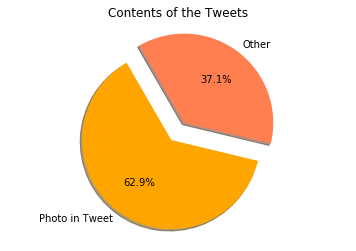

In [184]:
showPieChart(count, len(df)-count)

In [154]:
newdf = df.sort_values(['retweet_count', 'likes'], ascending=[False, False])
newdf = pd.unique(newdf[['tweet_text']].values.ravel('K'))

In [155]:
newdf = pd.DataFrame(newdf, columns=['tweet_text'])

In [156]:
newdf.head()

,tweet_text
0,Bollywood has one message to the people of Ind...
1,Bollywood star Smt. @deespeak has a message t...
2,नरेन्द्र मोदी डरपोक व्यक्ति है : कांग्रेस अध्य...
3,"This is the ""new India"" they want, one complet..."
4,Today you decide\nLove over hate\nJobs over pa...


In [157]:
tweets = newdf['tweet_text'][0 : 1000]

In [158]:
stopwords = set(STOPWORDS)
stopwords.update(['Nan','Unknown','https','co','@'])

In [159]:
cleanTweets = []
for i in range(len(tweets)):
    cleanTweets.append(clean_tweet(str(tweets.iloc[[i]].iloc[0])))

# Wordcloud of top 1000 most popular tweets

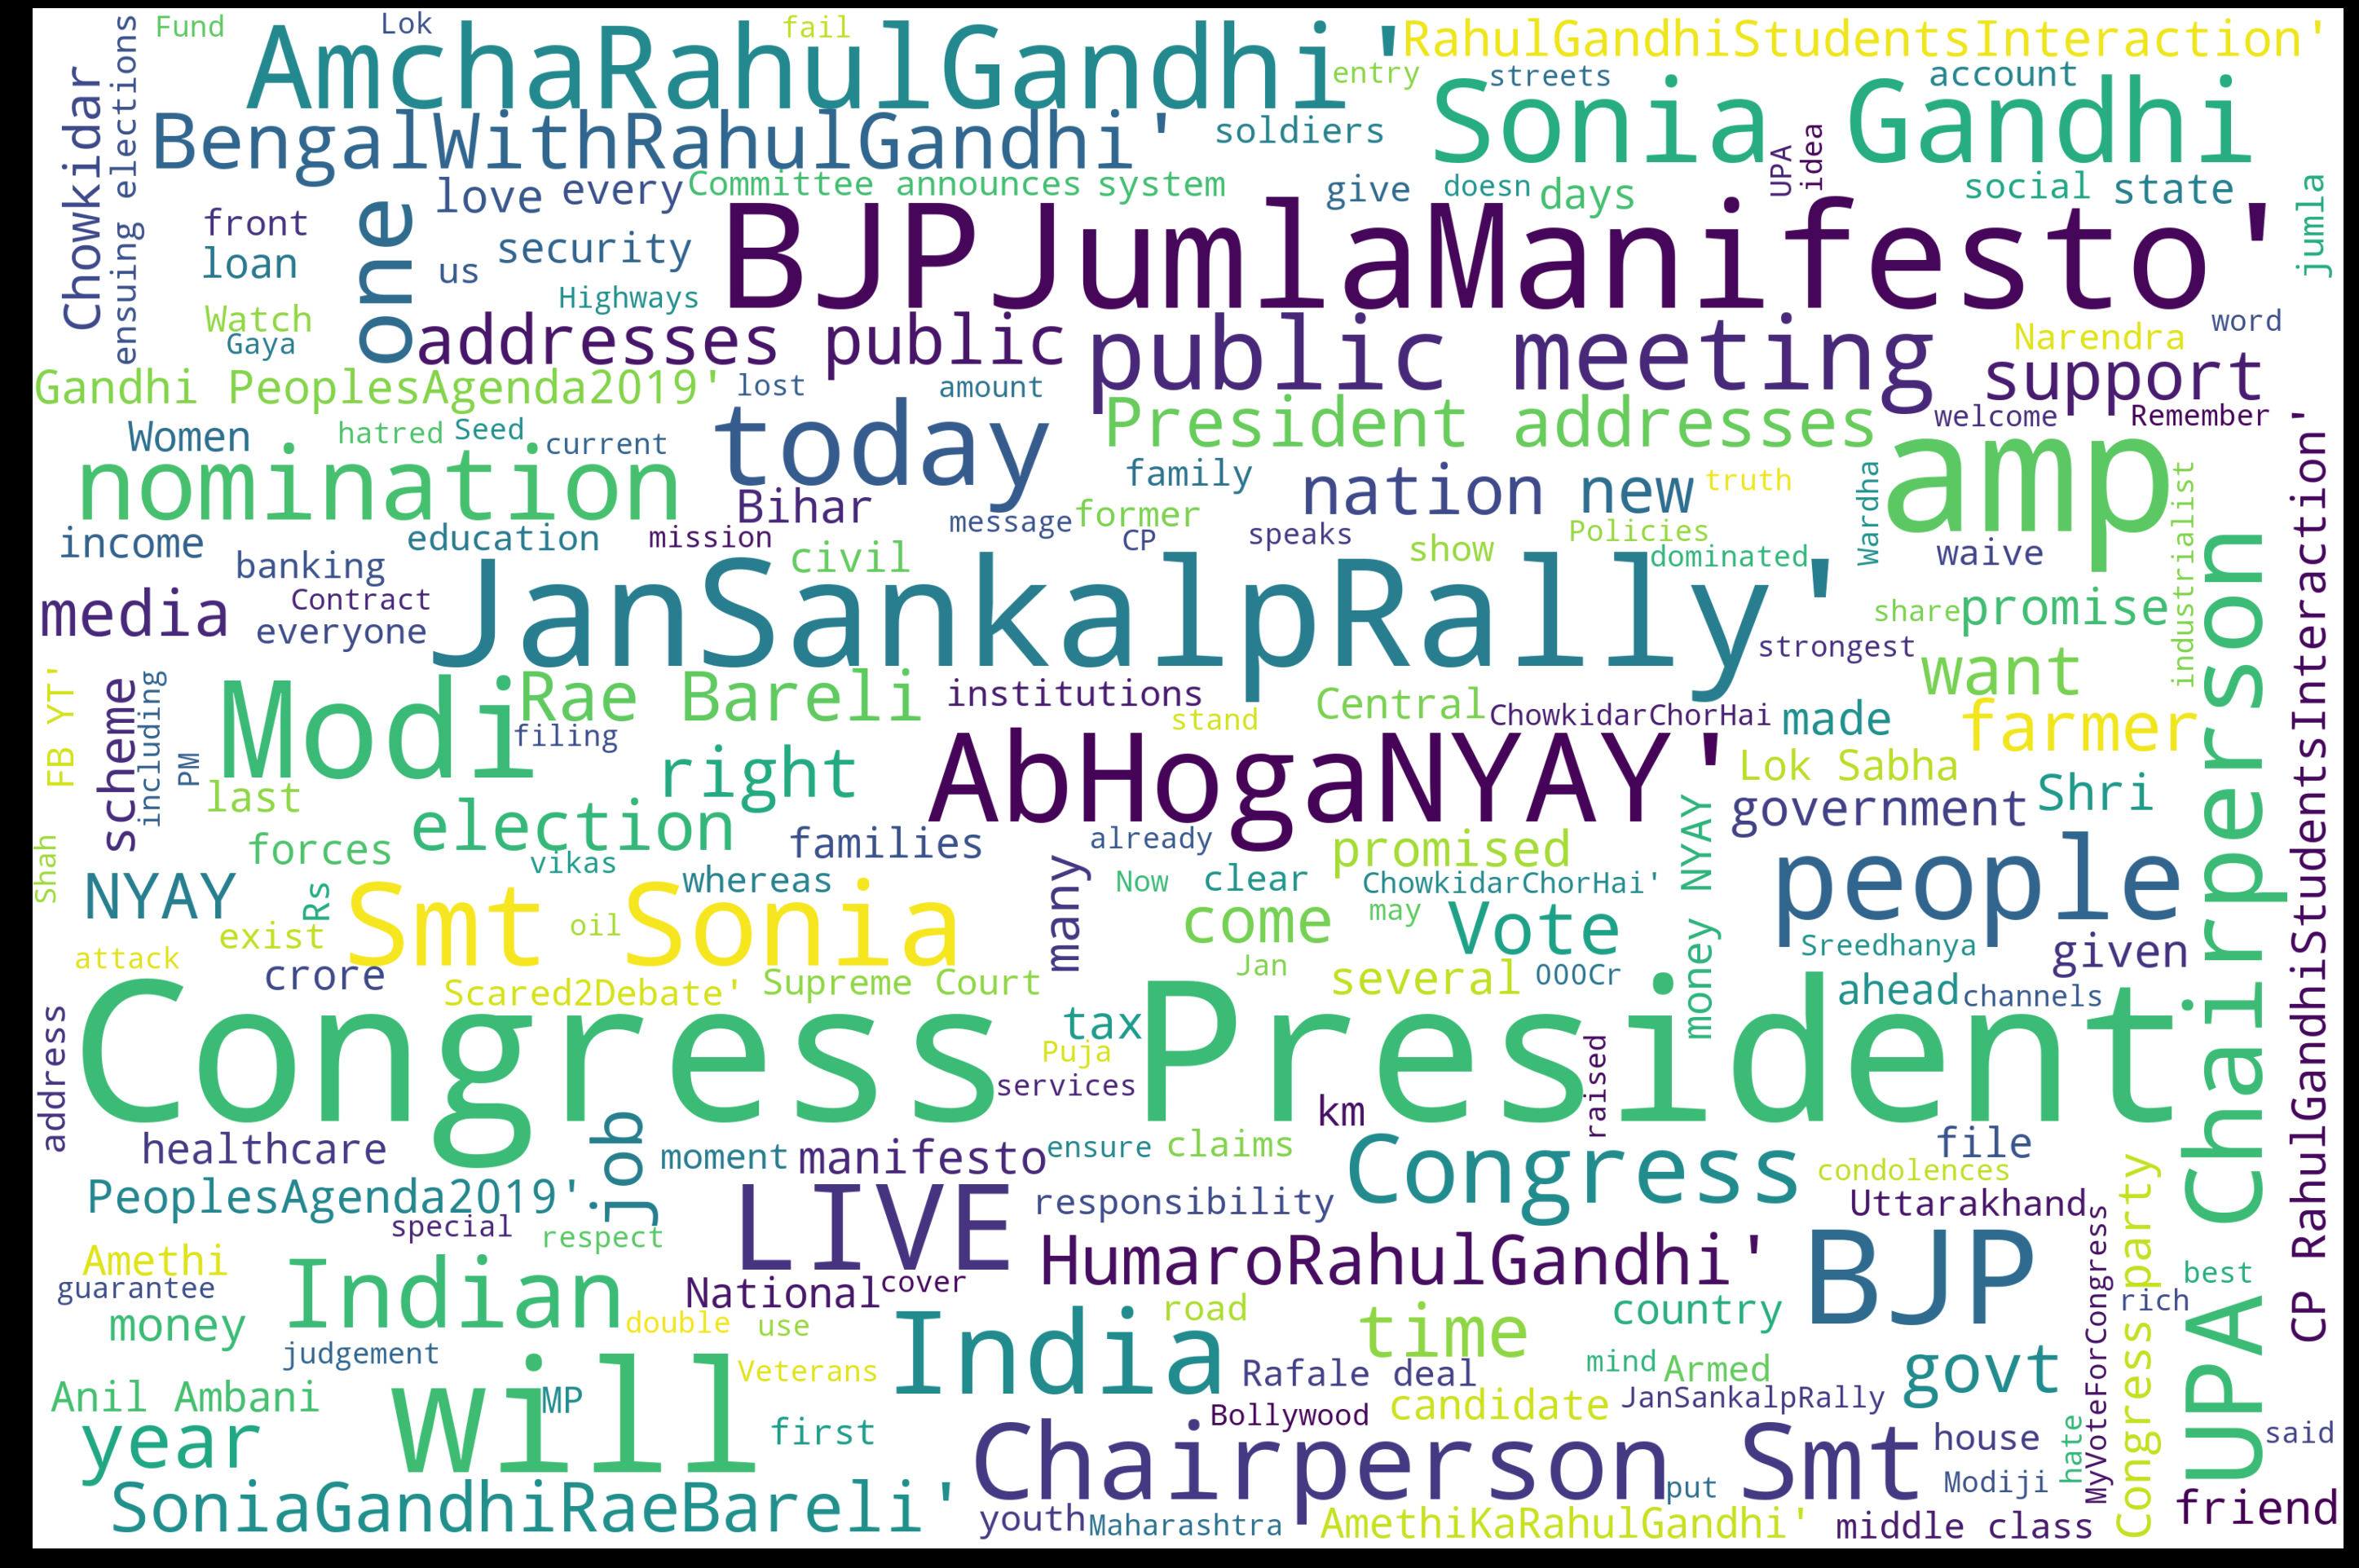

In [160]:
wordcloud_plot(cleanTweets, 'white')

# Reasons
The most occuring words are:
1. BJPJumlaManifesto - Negative pulicity of BJP's Menifesto 
2. Congress President - Party president is candidate for PM in this election.
3. JanSankalpRally - Name of campaign for this election, This is used as Hashtag for Tweets.
4. India - The country of the party, signifies Nationalist feelings of the party.

In [161]:
hashtags = df['hashtags']

In [162]:
hashtags.head()

2     NammaThalaivarRahulGandhi
7                           NaN
8                           NaN
9                           NaN
13         SoniaGandhiRaeBareli
Name: hashtags, dtype: object

In [163]:
hashtagCount = {}
for data in hashtags:
    if not type(data) is str:
        continue
    if data not in hashtagCount:
        hashtagCount[data] = 1
    else:
        hashtagCount[data] += 1

In [165]:
sorted_x = sorted(hashtagCount.items(), key=operator.itemgetter(1))

# Top 5 Hashtags

In [166]:
sorted_x[len(sorted_x)-5:len(sorted_x)]

[('PeoplesAgenda2019', 160),
 ('AmchaRahulGandhi', 202),
 ('AbHogaNYAY', 211),
 ('BJPJumlaManifesto', 355),
 ('JanSankalpRally', 391)]